In [1]:
import os
import io
import numpy
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [2]:
os.getcwd()

'C:\\Users\\hp\\Desktop\\old\\online_ml_class\\NavieBays'

In [15]:
%%writefile hello.py
lskjlk
ldfkjds
fsdf


Writing hello.py


In [3]:
os.path.exists('hello.py')

True

In [4]:
os.unlink("hello.py") # used to delete anyf file

In [5]:
os.listdir("C:\\users")

['All Users', 'Default', 'Default User', 'desktop.ini', 'hp', 'Public']

In [6]:
os.access("hello.py",os.R_OK)

False

In [17]:
os.path.abspath('./')

'C:\\Users\\hp\\Desktop\\MachineLearning\\Spam_Classifier'

In [19]:
path1 = "c:\\users\\hp"
path2 = "Desktop\\MachineLearning\\Spam_Classifier"
path = os.path.join(path1,path2)
path

'c:\\users\\hp\\Desktop\\MachineLearning\\Spam_Classifier'

In [7]:
os.mkdir('test')
os.mkdir('test/a')
os.mkdir('test/a/c')
os.mkdir('test/a/d')
os.mkdir('test/b')
os.mkdir('test/b/e')
os.mkdir('test/b/e/f')


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'test'

In [8]:
open("test/let.txt","w").write("hello i am test file")
open("test/a/hello.txt","w").write("hello i am hello.txt inside a")
open("test/a/bye.txt","w").write("Hello i am bye by a")
open("test/b/e/bye.txt","w").write("Hello bye from b")
open("test/b/e/f/f.txt","w").write("amzing isn't it")
open("test/b/hello.txt","w").write("i am the last one")

17

In [9]:
files = os.listdir("test")
print("files inside test folder : ",files)
f = []
d = []
for file in files : 
    path = os.path.join("test",file)
    if os.path.isfile(path):
        f.append(file)
    else : 
        d.append(file)
print("files are : ",f)
print("dires are : ",d)

files inside test folder :  ['a', 'b', 'let.txt']
files are :  ['let.txt']
dires are :  ['a', 'b']


In [10]:
print(*os.walk('test'),sep="\n")

('test', ['a', 'b'], ['let.txt'])
('test\\a', ['c', 'd'], ['bye.txt', 'hello.txt'])
('test\\a\\c', [], [])
('test\\a\\d', [], [])
('test\\b', ['e'], ['hello.txt'])
('test\\b\\e', ['f'], ['bye.txt'])
('test\\b\\e\\f', [], ['f.txt'])


In [12]:
print(*range(10))

0 1 2 3 4 5 6 7 8 9


In [15]:
print(*map(lambda x:x**2,[1,2,3,4,5]))

1 4 9 16 25


In [17]:
print(*"python")

p y t h o n


In [23]:
def hello(start=1,end=10):
    for var in range(start,end+1):
        yield var
    
var = hello()
print(var)

<generator object hello at 0x0000016BA27F9B88>


In [24]:
next(var)

1

In [25]:
next(var)

2

In [26]:
while True : 
    print(next(var))

3
4
5
6
7
8
9
10


StopIteration: 

In [27]:

def readFiles(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root, filename)
            inBody = False
            lines = []
            f = io.open(path, 'r', encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield filename, message


def dataFrameFromDirectory(path, classification):
    rows = []
    index = []
    for filename, message in readFiles(path):
        rows.append({'message': message, 'class': classification})
        index.append(filename)

    return DataFrame(rows, index=index)

data = DataFrame({'message': [], 'class': []})

data = data.append(dataFrameFromDirectory(os.path.join('emails/spam'), 'spam'))
data = data.append(dataFrameFromDirectory(os.path.join('emails/ham'), 'ham'))



C:\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [28]:
data.head()

,class,message
00001.7848dde101aa985090474a91ec93fcf0,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
00002.d94f1b97e48ed3b553b3508d116e6a09,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00003.2ee33bc6eacdb11f38d052c44819ba6c,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00004.eac8de8d759b7e74154f142194282724,spam,##############################################...
00005.57696a39d7d84318ce497886896bf90d,spam,I thought you might like these:\n\n1) Slim Dow...


In [29]:
data.tail()

,class,message
02496.aae0c81581895acfe65323f344340856,ham,Man killed 'trying to surf' on Tube train \n\n...
02497.60497db0a06c2132ec2374b2898084d3,ham,"Hi Gianni,\n\n\n\nA very good resource for thi..."
02498.09835f512f156da210efb99fcc523e21,ham,Gianni Ponzi wrote:\n\n> I have a prob when tr...
02499.b4af165650f138b10f9941f6cc5bce3c,ham,Neale Pickett <neale@woozle.org> writes:\n\n\n...
02500.05b3496ce7bca306bed0805425ec8621,ham,"\n\nHi,\n\n\n\nI think you need to give us a l..."


In [52]:
label = data.loc[s.index,:]['class']

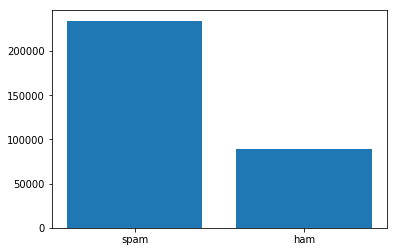

In [54]:
import matplotlib.pyplot as plt

plt.bar(x=label,height=s.values)
plt.show()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

obj  = CountVectorizer()
data = ["Hello World how how  are you this is is good",
        "hi world this is good let's go go go go this this this ",
        "let's have fun fun fun have fun" ]

x = obj.fit_transform(data)
print(*data,sep='\n',end='\n\n')
print(obj.vocabulary_)
print(x)

Hello World how how  are you this is is good
hi world this is good let's go go go go this this this 
let's have fun fun fun have fun

{'hello': 5, 'world': 11, 'how': 7, 'are': 0, 'you': 12, 'this': 10, 'is': 8, 'good': 3, 'hi': 6, 'let': 9, 'go': 2, 'have': 4, 'fun': 1}
  (0, 3)	1
  (0, 8)	2
  (0, 10)	1
  (0, 12)	1
  (0, 0)	1
  (0, 7)	2
  (0, 11)	1
  (0, 5)	1
  (1, 2)	4
  (1, 9)	1
  (1, 6)	1
  (1, 3)	1
  (1, 8)	1
  (1, 10)	4
  (1, 11)	1
  (2, 1)	4
  (2, 4)	2
  (2, 9)	1


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

data = DataFrame({'message': [], 'class': []})
data = data.append(dataFrameFromDirectory(os.path.join('emails/spam'), 'spam'))
data = data.append(dataFrameFromDirectory(os.path.join('emails/ham'), 'ham'))

vectorizer = CountVectorizer()

counts = vectorizer.fit_transform(data['message'].values)

classifier = MultinomialNB()
targets = data['class']
classifier.fit(counts, targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
examples = ['Free Viagra now!!!', "Hi Bob, how about a game of golf tomorrow?"]
example_counts = vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions

array(['spam', 'ham'], dtype='<U4')

In [40]:
examples = ['Free Absolutly Free, i am not free','hey its urgent to inform you ',
           'i am not free to introduce you to python.']
example_counts = vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions

array(['spam', 'ham', 'ham'], dtype='<U4')

In [42]:
e = [ 'can we go for dinner today', 'free join free PayBox Get rs100 back','try our P&G products free of cost']
ex = vectorizer.transform(e)
p = classifier.predict(ex)
p

array(['ham', 'ham', 'ham'], dtype='<U4')

In [11]:
path = "emails/spam/"

In [12]:
import os

In [14]:
c = 1
data = []
for var in os.listdir(path):
    f = open(os.path.join(path,var))
    inbody = False
    lines  = []
    
    for line in f : 
        if inbody : 
            lines.append(line)
        elif line is '\n' : 
            inbody = True
    data.append('\n'.join(lines))
    if c == 5 : 
        break 
    c = c + 1


In [15]:
import pandas as pd

In [16]:
pd.DataFrame(data)

,0
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
3,##############################################...
4,I thought you might like these:\n\n1) Slim Dow...
